Input Variables:

* Brand - car model name

* Year - Registration Year

* Fuel - Fuel type of vehicle

* Transmission - Vehicle transmission

* Running Km - KM driven

Target Variable:

* Price - Price of the car

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset,

df = pd.read_excel("UsedCar.xlsx")
df

,Unnamed: 0,Brand,Price,Year,Fuel,Transmission,Running KM
0,0,BMW 1 Series 2L M135i,34075,2020,Petrol,Automatic,3234
1,1,BMW 1 Series 2L M135i,33900,2020,Petrol,Automatic,8362
2,2,BMW 1 Series 2L M135i,33025,2020,Petrol,Automatic,6970
3,3,Mercedes-Benz A Class 1.3L AMG Line A250e,32225,2020,Plug_in_hybrid,Automatic,3548
4,4,Mini Clubman 2L John Cooper Works,32175,2020,Petrol,Automatic,4962
...,...,...,...,...,...,...,...
9975,9975,Mercedes-Benz A Class 1.3L AMG Line A200,27750,2019,Petrol,Automatic,14530
9976,9976,Mercedes-Benz A Class 1.3L AMG Line A200,27200,2019,Petrol,Automatic,8623
9977,9977,Mercedes-Benz A Class 2L AMG Line A200d,27050,2020,Diesel,Automatic,13038
9978,9978,Mercedes-Benz A Class 1.3L AMG Line A180,26900,2019,Petrol,Automatic,4359


In [3]:
#dropping unwanted columns as it will not have any impact,

df = df.drop(columns = ['Unnamed: 0'], axis = 1)
df.head()

,Brand,Price,Year,Fuel,Transmission,Running KM
0,BMW 1 Series 2L M135i,34075,2020,Petrol,Automatic,3234
1,BMW 1 Series 2L M135i,33900,2020,Petrol,Automatic,8362
2,BMW 1 Series 2L M135i,33025,2020,Petrol,Automatic,6970
3,Mercedes-Benz A Class 1.3L AMG Line A250e,32225,2020,Plug_in_hybrid,Automatic,3548
4,Mini Clubman 2L John Cooper Works,32175,2020,Petrol,Automatic,4962


In [4]:
# Info of the each column in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9980 non-null   object
 1   Price         9980 non-null   int64 
 2   Year          9980 non-null   int64 
 3   Fuel          9980 non-null   object
 4   Transmission  9980 non-null   object
 5   Running KM    9980 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 467.9+ KB


In [5]:
# Checking is there any null values present in dataset

df.isnull().sum()

Brand           0
Price           0
Year            0
Fuel            0
Transmission    0
Running KM      0
dtype: int64

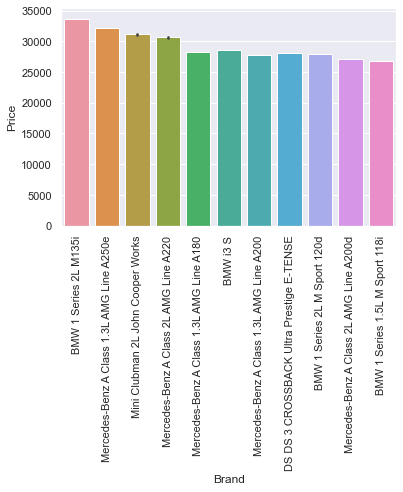

In [6]:
sns.set_theme()
sns.barplot(x = 'Brand', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.show()

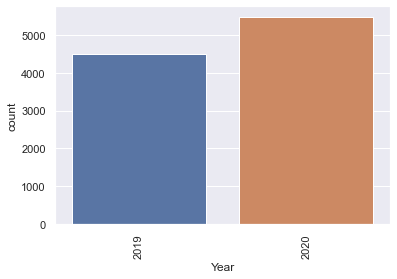

In [7]:
sns.countplot(x = df['Year'])
plt.xticks(rotation = 90)
plt.show()

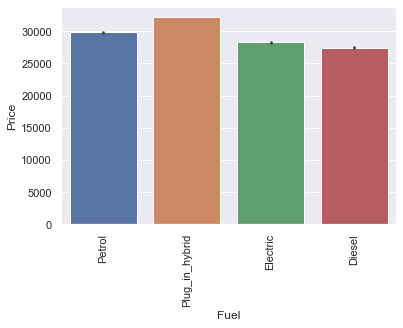

In [9]:
sns.barplot(x = 'Fuel', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.show()

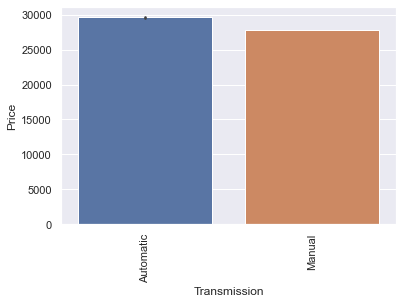

In [10]:
sns.barplot(x = 'Transmission', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.show()

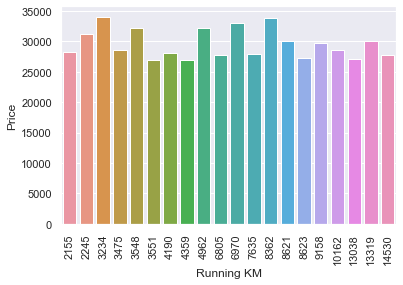

In [11]:
sns.barplot(x = 'Running KM', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.show()

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Running KM'}>, <AxesSubplot:>]],
      dtype=object)

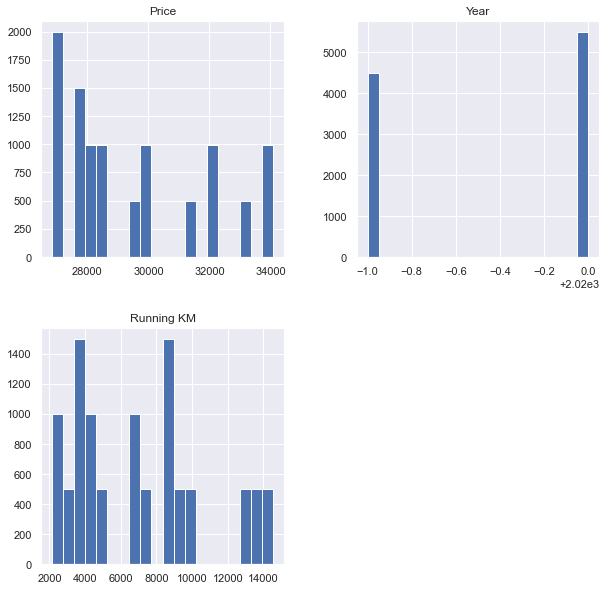

In [12]:
df.hist(bins = 20, figsize = (10,10))

In [13]:
# SPlitting numerical and categorical data

num = df.select_dtypes(exclude = object)
cat = df.select_dtypes(include = object)

In [14]:
# Applying label Encoder to encode categorical into numerical

le = LabelEncoder()
cat = cat.apply(le.fit_transform)

In [15]:
cat

,Brand,Fuel,Transmission
0,2,2,0
1,2,2,0
2,2,2,0
3,7,3,0
4,10,2,0
...,...,...,...
9975,6,2,0
9976,6,2,0
9977,8,0,0
9978,5,2,0


In [16]:
num

,Price,Year,Running KM
0,34075,2020,3234
1,33900,2020,8362
2,33025,2020,6970
3,32225,2020,3548
4,32175,2020,4962
...,...,...,...
9975,27750,2019,14530
9976,27200,2019,8623
9977,27050,2020,13038
9978,26900,2019,4359


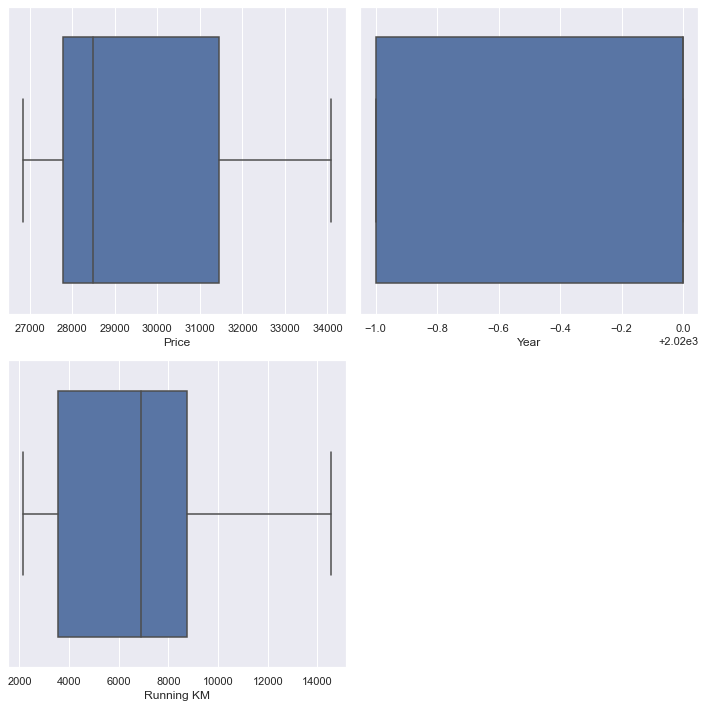

In [17]:
plt.figure(figsize = (10,10))
pltnumber = 1
                                            # boxplot for numerical columns for train dataset
for column in num:
    if pltnumber<=4:
        ax = plt.subplot(2,2,pltnumber)
        sns.boxplot(num[column])
        plt.xlabel(column,fontsize=12)
        pltnumber+=1
plt.tight_layout()

In [18]:
# Merging Numerical and categorical dataset

df1 = pd.concat([num,cat],axis = 1)
df1

,Price,Year,Running KM,Brand,Fuel,Transmission
0,34075,2020,3234,2,2,0
1,33900,2020,8362,2,2,0
2,33025,2020,6970,2,2,0
3,32225,2020,3548,7,3,0
4,32175,2020,4962,10,2,0
...,...,...,...,...,...,...
9975,27750,2019,14530,6,2,0
9976,27200,2019,8623,6,2,0
9977,27050,2020,13038,8,0,0
9978,26900,2019,4359,5,2,0


In [19]:
# Splitting X and Y values.

x = df1.drop(columns = ['Price'], axis = 1)
y = df1['Price']

In [20]:
#Scaling the data for normalize the range of values to 0-1.

scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [21]:
# Train test Split

x_train,x_test,y_train,y_test = train_test_split(x_sc,y, test_size = 0.20, random_state = 555)

In [22]:
# Random forest algorithm

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
scr_rfr = cross_val_score(rfr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rfr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", rfr.score(x_train,y_train))
print("Test Score", rfr.score(x_test,y_test))

r2_Score 1.0
CV Score 1.0
MSE 0.0
RMSE 0.0
Train Score 1.0
Test Score 1.0


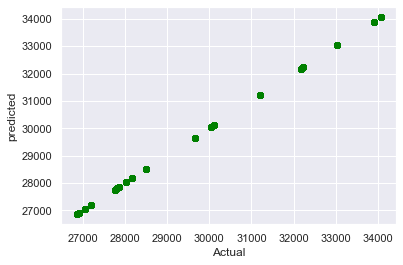

In [23]:
plt.scatter(y_test,y_pred, color = 'green')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [24]:
#K Neighbors

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
scr_knr = cross_val_score(knr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_knr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", knr.score(x_train,y_train))
print("Test Score", knr.score(x_test,y_test))

r2_Score 1.0
CV Score 1.0
MSE 0.0
RMSE 0.0
Train Score 1.0
Test Score 1.0


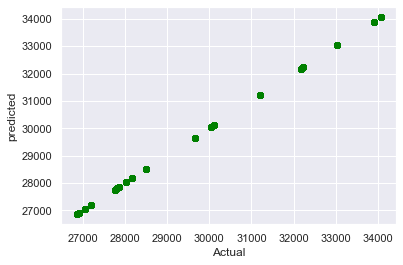

In [25]:
plt.scatter(y_test,y_pred, color = 'green')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [26]:
#Gradient Boost Regressor

from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
scr_gbr = cross_val_score(gbr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_gbr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", gbr.score(x_train,y_train))
print("Test Score", gbr.score(x_test,y_test))

r2_Score 0.9998731520563713
CV Score 0.9999217097684492
MSE 699.6136273652209
RMSE 26.450210346332234
Train Score 0.9998770071137332
Test Score 0.9998731520563713


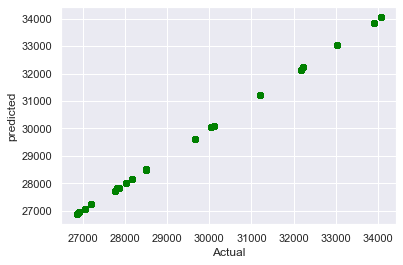

In [27]:
plt.scatter(y_test,y_pred, color = 'green')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [28]:
# Ada boost

from sklearn.ensemble import AdaBoostRegressor 
abr = AdaBoostRegressor()
abr.fit(x_train, y_train)
y_pred = abr.predict(x_test)
scr_abr = cross_val_score(abr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_abr.mean())
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Train Score", abr.score(x_train,y_train))
print("Test Score", abr.score(x_test,y_test))

r2_Score 0.964570867450033
CV Score 0.9476175710478933
MSE 195404.854257941
RMSE 442.04621280805134
Train Score 0.9643246954630958
Test Score 0.964570867450033


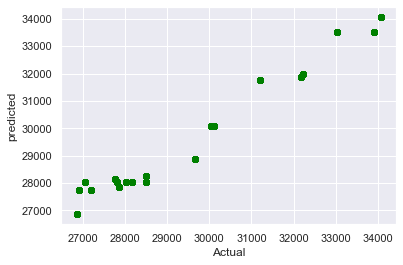

In [29]:
plt.scatter(y_test,y_pred, color = 'green')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

As we can see that random forest and KNeighbors are having high accuracy of 100%.

Let's apply hyper parameter tuning for RANDOM FOREST Model.

In [30]:
param = {'n_estimators' : [40,60,80,100] ,'max_depth': [4,8,12,16,20],'criterion' : ['mse','mae'],
             'min_samples_leaf' : [2,4,6,8,10], 'min_samples_split' : [3,6,9,12,15] }

In [31]:
gs = RandomizedSearchCV(rfr, param_distributions = param, cv= 5)    # Hyper parameter tune by randomized search CV
gs.fit(x_train,y_train)
gs.best_params_ 

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_depth': 12,
 'criterion': 'mse'}

In [32]:
final = RandomForestRegressor(n_estimators=80 , criterion = 'mse', max_depth = 20, 
                               min_samples_leaf =8,min_samples_split =6)

final.fit(x_train,y_train)
pred = final.predict(x_test)
print("r2_Score", r2_score(y_test,pred))

r2_Score 1.0


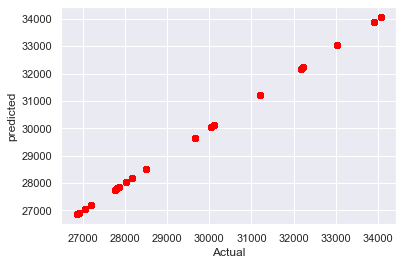

In [33]:
plt.scatter(y_test,pred, color = 'red')      #Scatter Matrix for Actual VS predicted for the model
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [34]:
# Saving the model

import joblib
joblib.dump(final,"UsedCar_Price.pkl")

['UsedCar_Price.pkl']